In [1]:
import pandas as pd
import numpy as np
#自作モジュール
from regression_tools import load_data, evaluate_performance, evaluate_model, perform_rf_regression

In [2]:
df = load_data()
df

,x1,x2,x3,x4,x5,x6,x7,y
2024-01-01 00:05:00,0.266419,0.633665,0.774621,0.555084,0.756059,0.811341,0.786373,0.180295
2024-01-01 00:06:00,0.265904,0.654012,0.774420,0.551762,0.766794,0.851661,0.820795,0.177124
2024-01-01 00:07:00,0.265388,0.672287,0.773997,0.548440,0.761244,0.805605,0.822079,0.173618
2024-01-01 00:08:00,0.263477,0.639337,0.762100,0.545118,0.753249,0.811175,0.789002,0.171640
2024-01-01 00:09:00,0.252709,0.662216,0.770372,0.541796,0.745255,0.813164,0.789002,0.166972
...,...,...,...,...,...,...,...,...
2024-01-02 15:49:00,0.284859,0.645894,0.688723,0.355109,0.615583,0.608848,0.500866,0.256710
2024-01-02 15:50:00,0.266139,0.665503,0.665640,0.354275,0.588834,0.582074,0.508999,0.243800
2024-01-02 15:51:00,0.247419,0.665706,0.664740,0.353441,0.561301,0.602186,0.523348,0.228881
2024-01-02 15:52:00,0.228699,0.672975,0.677300,0.352607,0.530730,0.636970,0.537697,0.212624


In [3]:
# 説明変数Xと目的変数yに分割
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

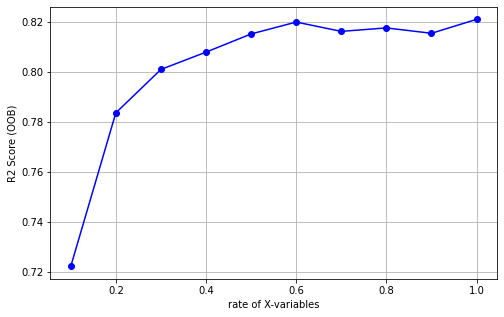

Optimal rate of X-variables: 1.0
Evaluating Training Data
R^2: 0.438, RMSE: 0.106, MAE: 0.072


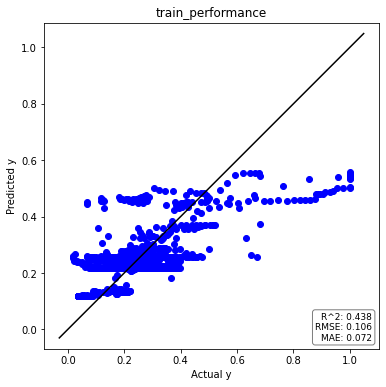

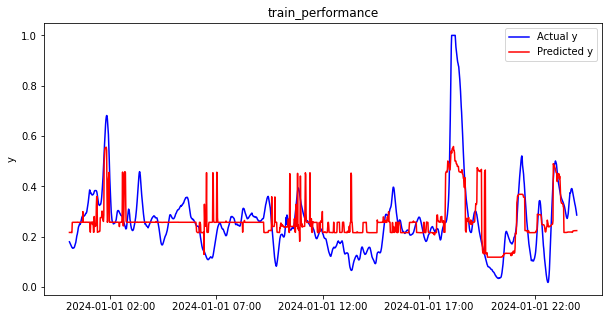

Evaluating Test Data
R^2: -0.048, RMSE: 0.186, MAE: 0.145


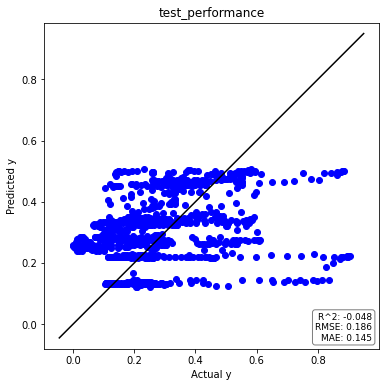

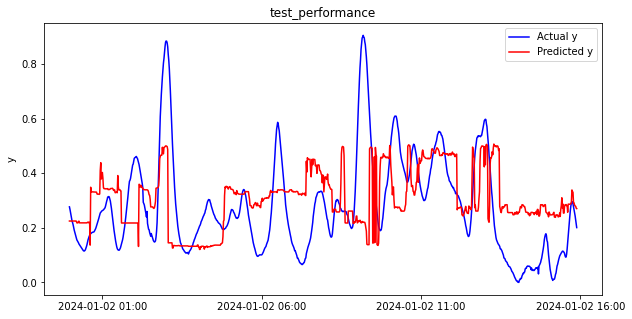

In [4]:
# 関数の実行
optimal_x_variables_rate, rf_final = perform_rf_regression(X, y)

## ラグ特徴量のデータセットを作成

In [6]:
# ラグの値
lags = [21, 11, 13, 8, 20, 22, 22]

# 新しいデータフレームを作成
df_lag = pd.DataFrame(index=X.index)

# 各変数に対して指定されたラグを適用
for i, lag in enumerate(lags, start=1):
    df_lag[f'x{i}_lag_{lag}'] = X[f'x{i}'].shift(lag)

# 目的変数 y もデータフレームに追加
df_lag['y'] = y

# NaN値を含む行を削除
df_lag.dropna(inplace=True)

# 結果を表示
df_lag

,x1_lag_21,x2_lag_11,x3_lag_13,x4_lag_8,x5_lag_20,x6_lag_22,x7_lag_22,y
2024-01-01 00:27:00,0.265904,0.646673,0.399749,0.508577,0.761244,0.811341,0.786373,0.209524
2024-01-01 00:28:00,0.265388,0.643488,0.415839,0.505255,0.753249,0.851661,0.820795,0.217239
2024-01-01 00:29:00,0.263477,0.648017,0.393531,0.501933,0.745255,0.805605,0.822079,0.225180
2024-01-01 00:30:00,0.252709,0.650056,0.407415,0.501675,0.725115,0.811175,0.789002,0.235455
2024-01-01 00:31:00,0.241941,0.668560,0.403270,0.504880,0.703196,0.813164,0.789002,0.241007
...,...,...,...,...,...,...,...,...
2024-01-02 15:49:00,0.305415,0.694092,0.672388,0.338842,0.604214,0.635408,0.554920,0.256710
2024-01-02 15:50:00,0.342301,0.646039,0.746692,0.346504,0.660703,0.748325,0.668277,0.243800
2024-01-02 15:51:00,0.379188,0.662911,0.746352,0.354166,0.707569,0.795618,0.719018,0.228881
2024-01-02 15:52:00,0.416074,0.658222,0.751197,0.359279,0.756901,0.827445,0.744901,0.212624


In [7]:
# 説明変数Xと目的変数yに分割
X_lag = df_lag.iloc[:, :-1]
y_lag = df_lag.iloc[:, -1]

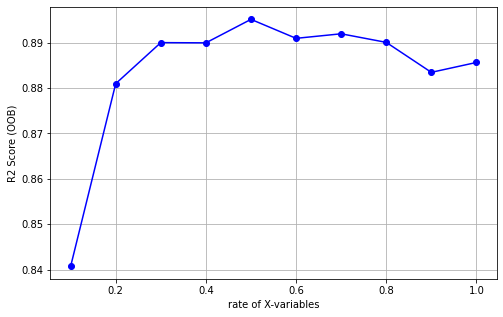

Optimal rate of X-variables: 0.5
Evaluating Training Data
R^2: 0.708, RMSE: 0.076, MAE: 0.054


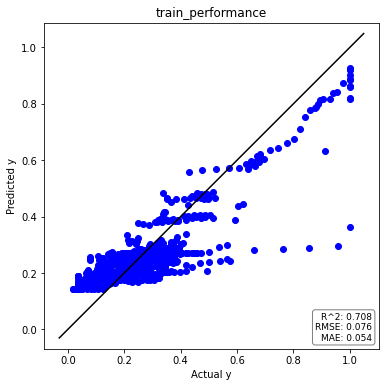

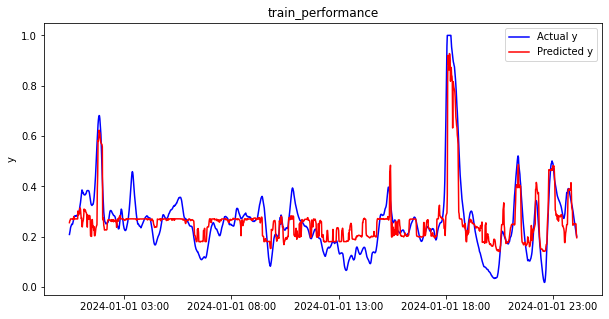

Evaluating Test Data
R^2: 0.552, RMSE: 0.122, MAE: 0.090


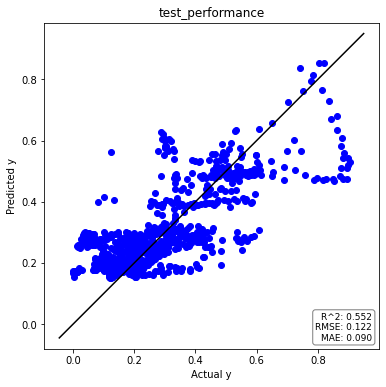

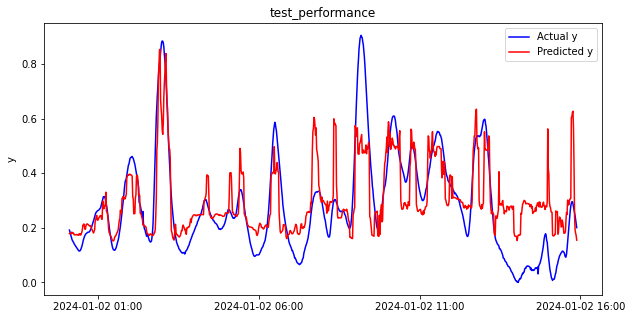

In [8]:
# 関数の実行
optimal_x_variables_rate, rf_final = perform_rf_regression(X_lag, y_lag)